# The Sparks Foundation - GRIP - Data Science and Business Analytics - DECEMBER2021
## TASK 1 : Prediction using supervised ML
### Dataset used: Student Scores
#### Problem Statement(s) :
##### Predict the percentage of a student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?
### Import required libraries


In [40]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv dataset and setting the path

In [41]:
path = r"C:\Users\prati\Desktop\TSF\task1\student_scores.csv.txt"
s_data = pd.read_csv(path)

In [42]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
s_data.shape

(25, 2)

In [44]:
s_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [45]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Visualization of data

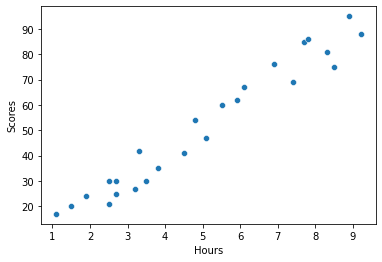

In [46]:
sns.scatterplot(x=s_data['Hours'], y=s_data['Scores']);

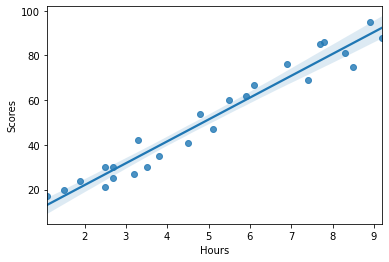

In [47]:
sns.regplot(x=s_data['Hours'], y=s_data['Scores']);

#### Features and targets

In [48]:
X = s_data[['Hours']]
y = s_data['Scores']

#### Train and split

In [49]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

#### Model building

In [50]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [51]:
regressor.fit(train_X, train_y)

LinearRegression()

In [52]:
pred_y = regressor.predict(val_X)

In [53]:
pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


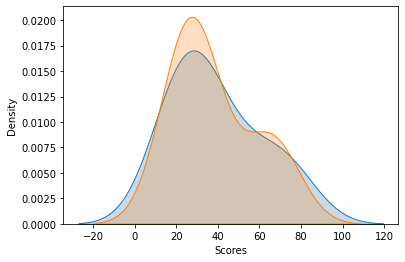

In [54]:
sns.kdeplot(pred_y,label="Predicted", shade=True);

sns.kdeplot(data=val_y, label="Actual", shade=True);

In [55]:
print('Train accuracy: ', regressor.score(train_X, train_y),'\nTest accuracy : ', regressor.score(val_X, val_y) )

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365056


In [56]:
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  93.89272889341652
